### Individual Homework

#### Enter your name here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [2]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [ ]:
movies.shape[0] # count of all movies
movies.groupby("genre").count().sort_values("title", ascending=False) # descending by number
# movies.groupby("genre").count().sort_values("genre", ascending=False) # descending by genre's alphabetical order

,title,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
genre,,,,,,,,,,
Comedy,848,848,848,848,848,848,848,848,848,848
Action,738,738,738,738,738,738,738,738,738,738
Drama,498,498,498,498,498,498,498,498,498,498
Adventure,288,288,288,288,288,288,288,288,288,288
Crime,202,202,202,202,202,202,202,202,202,202
Biography,135,135,135,135,135,135,135,135,135,135
Horror,131,131,131,131,131,131,131,131,131,131
Animation,35,35,35,35,35,35,35,35,35,35
Fantasy,28,28,28,28,28,28,28,28,28,28


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [13]:
genre_avg = (
    movies
    .groupby('genre')[['gross', 'budget']]
    .mean()
    .assign(return_on_budget = lambda x: x.gross / x.budget)
    .sort_values("return_on_budget", ascending=False)
)

genre_avg

,gross,budget,return_on_budget
genre,,,
Musical,9.208400e+07,3.189500e+06,28.870983
Family,1.491605e+08,1.483333e+07,10.055763
Western,2.082188e+07,3.465000e+06,6.009202
Documentary,1.735397e+07,5.887852e+06,2.947420
Horror,3.771374e+07,1.350492e+07,2.792593
Fantasy,4.240884e+07,1.758214e+07,2.412040
Comedy,4.263055e+07,2.444632e+07,1.743843
Mystery,6.753302e+07,3.921875e+07,1.721958
Animation,9.843379e+07,6.170143e+07,1.595324


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [26]:
top_dir = (
    movies
    .groupby('director')['gross']
    .agg(
        total_gross ='sum',
        mean = 'mean',
        median = 'median',
        standard_dev = 'std'
    )
    .sort_values('total_gross', ascending=False)
    .head(15)
)

top_dir

,total_gross,mean,median,standard_dev
director,,,,
Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

/tmp/ipykernel_8812/3834886441.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=movies, x='rating', hue='genre', fill=True, common_norm=False, alpha=0.5)
/tmp/ipykernel_8812/3834886441.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre')


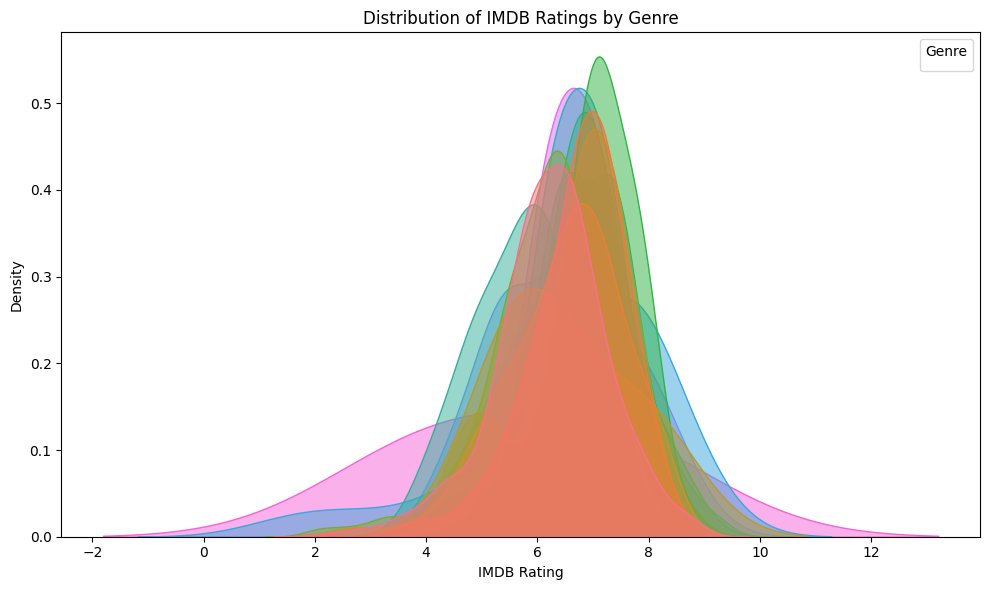

In [ ]:
ratings = (
    movies
    .groupby('genre')['rating']
    .agg(
        mean = 'mean',
        median = 'median',
        minimum = 'min',
        maximum = 'max',
        standard_deviation = 'std'
    )
)

ratings.head()

plt.figure(figsize=(10,6))
sns.kdeplot(data=movies, x='rating', hue='genre', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of IMDB Ratings by Genre')
plt.xlabel('IMDB Rating')
plt.ylabel('Density')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [49]:
# show table of cast_facebook_likes by genre mean, median, min, max, std
cast_likes = (
    movies
    .groupby('genre')['cast_facebook_likes']
    .agg(
        mean = 'mean',
        median = 'median',
        minimum = 'min',
        maximum = 'max',
        standard_deviation = 'std'
    )
    .sort_values('mean', ascending=False)
    .head()
)

cast_likes

,mean,median,minimum,maximum,standard_deviation
genre,,,,,
Biography,15278.385185,7243.0,4,75793,17954.819976
Action,14596.607046,8534.0,2,263584,18826.491233
Adventure,13927.361111,4955.0,49,81385,17702.779809
Crime,13457.792079,11616.0,2,101383,14412.481908
Animation,12496.657143,4774.0,7,70996,18116.361372


Explanation:
Knowing which genre has the most famous cast can help us decide that are the movies in the specific genre watched only because of famous cast or because other factors (storyline) as well.

Interpretation:
Even though we have this beatiful ranking, as the standard deviation is so big in each case (the data is skewed), future filtering is required to reach any conclusion.

#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

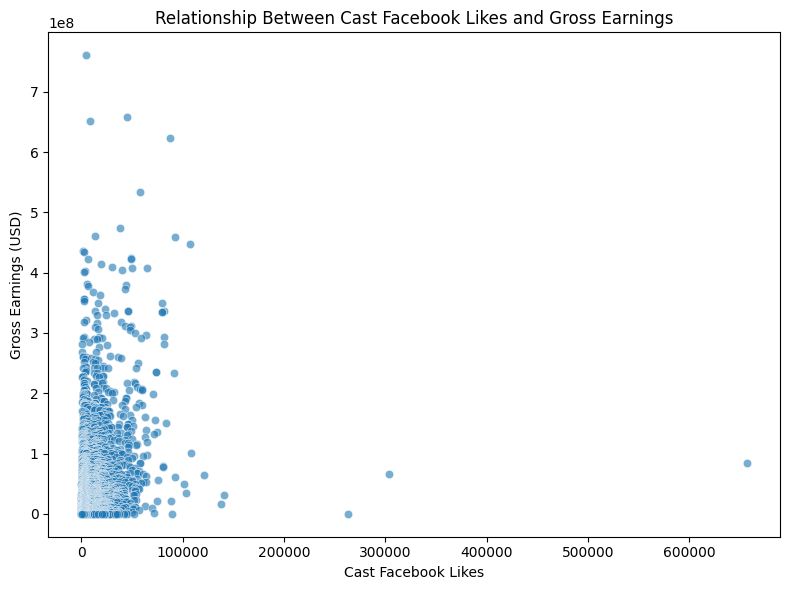

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=movies, x='cast_facebook_likes', y='gross', alpha=0.6)
plt.title('Relationship Between Cast Facebook Likes and Gross Earnings')
plt.xlabel('Cast Facebook Likes')
plt.ylabel('Gross Earnings (USD)')
plt.tight_layout()
plt.show()

ANSWER:
Besides having a few outliars, saying that more likes equals more money would be false. Furthermore, having more than one million likes means only that the film made less than 200 million dollars.

**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

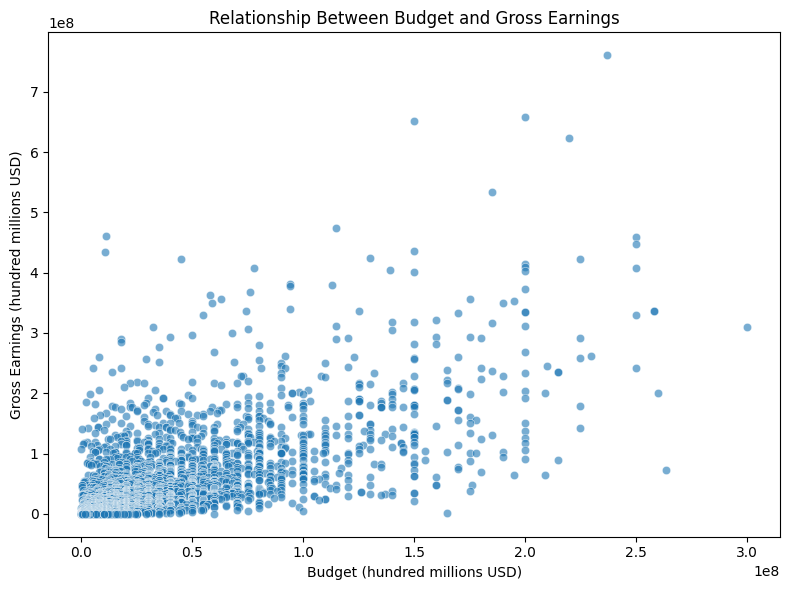

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=movies, x='budget', y='gross', alpha=0.6)
plt.title('Relationship Between Budget and Gross Earnings')
plt.xlabel('Budget (hundred millions USD)')
plt.ylabel('Gross Earnings (hundred millions USD)')
plt.tight_layout()
plt.show()

ANSWER: 
Some movies used the more money well enough to produce amazing (-ly profitable) result, but this fact doesn't mean a significantly increasing tendency. Let's say you have more chance to reach close to 400 millions of revenue having 200 million dollar in the budget rather than only the half of it.

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

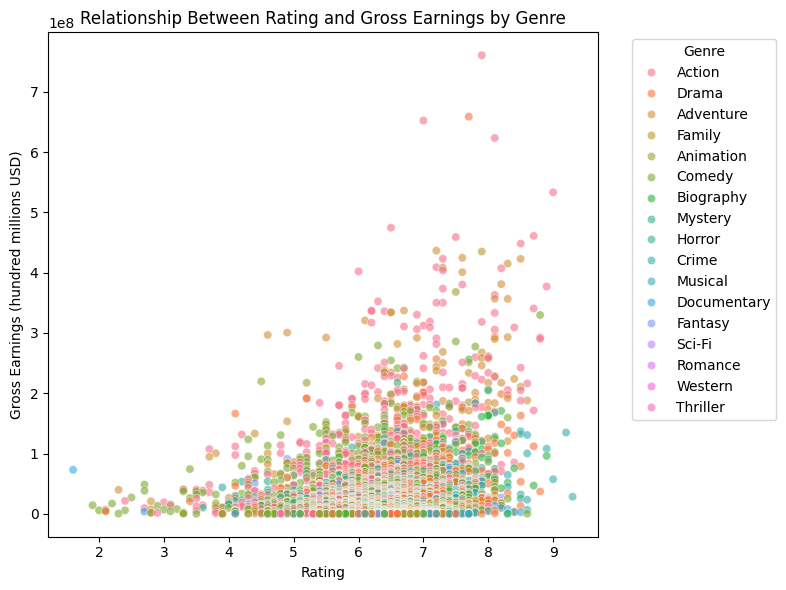

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=movies, x='rating', y='gross', hue='genre', alpha=0.6)
plt.title('Relationship Between Rating and Gross Earnings by Genre')
plt.xlabel('Rating')
plt.ylabel('Gross Earnings (hundred millions USD)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ANSWER: Surely IMDB hardly gives a 10, higher does not leads straightforward to having a lot of revenue. Movies with really low rating (below 4) seems to hardly make any money, while many of the movies with rating between 4 and 8 are stuck around 100 hundred million dollars in revenue.

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

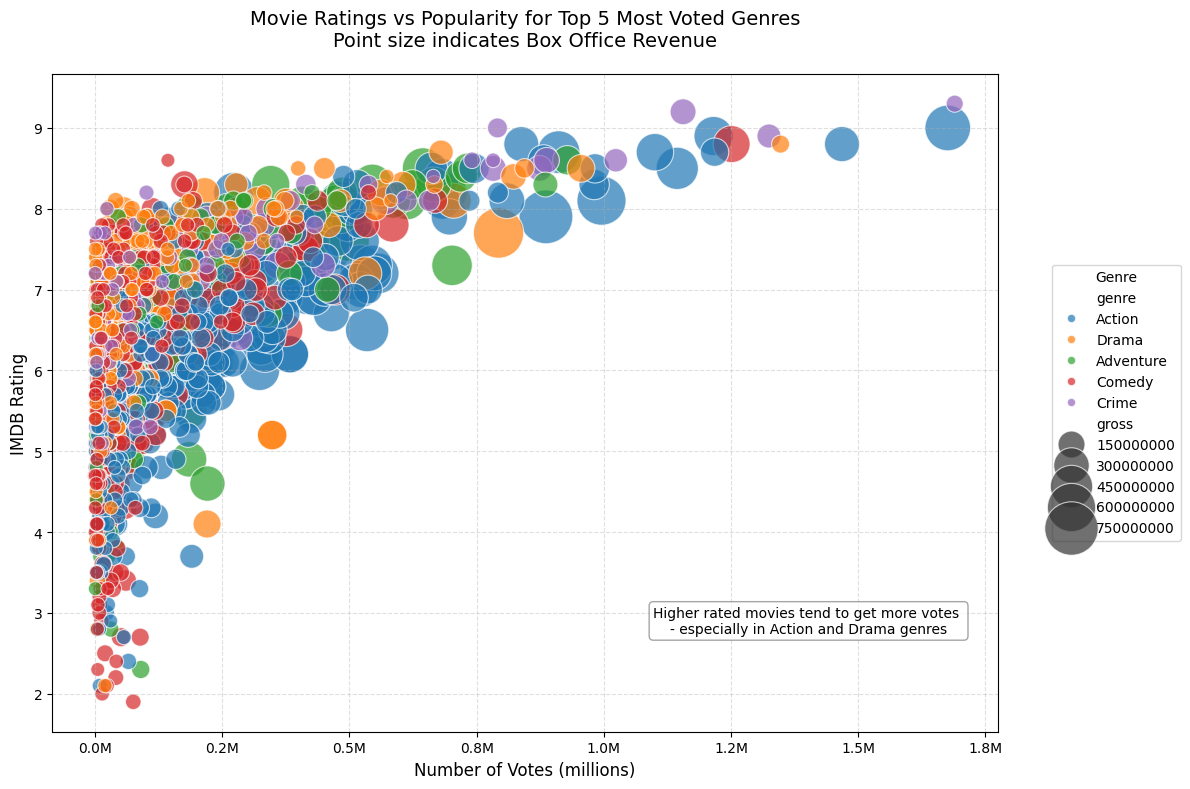

In [74]:
plt.figure(figsize=(12, 8))

# Create scatter plot with enhanced visualization
scatter = sns.scatterplot(data=top_genres_data, 
                         x='votes', 
                         y='rating',
                         hue='genre',
                         size='gross',
                         sizes=(100, 1500),
                         alpha=0.7,
                         legend='brief')

# Customize the plot
plt.title('Movie Ratings vs Popularity for Top 5 Most Voted Genres\nPoint size indicates Box Office Revenue', 
          fontsize=14, 
          pad=20)
plt.xlabel('Number of Votes (millions)', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)

# Format x-axis to millions
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'
scatter.xaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# Create legend for genres only
plt.legend(title='Genre', 
          bbox_to_anchor=(1.05, 0.5),
          loc='center left')

# Add annotation text box
plt.annotate('Higher rated movies tend to get more votes \n- especially in Action and Drama genres', 
            xy=(0.8, 0.15),             # Position in plot coordinates
            xycoords='axes fraction',   # Use relative coordinates
            bbox=dict(facecolor='white',
                     edgecolor='gray',
                     alpha=0.7,
                     boxstyle='round'), # Rounded corners
            fontsize=10,
            ha='center')               # Center align text

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.